In [1]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
    'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
    'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
    'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
    'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
    'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
    'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
    'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
downloadingimages_02.tar.gz...
downloadingimages_03.tar.gz...


KeyboardInterrupt: 

In [3]:
!tar -xf images_01.tar.gz

In [1]:
import os
from PIL import Image
import numpy as np
for subdir, dirs, files in os.walk('./images'):
    #print(len(files))
    for file in files:
        newimg = Image.open('./images/'+file)
        newimg = newimg.resize((224,224))
        newimg.save('./smallimages/'+file)

KeyboardInterrupt: 

In [2]:
newimg = Image.open('./images/00000468_035.png')

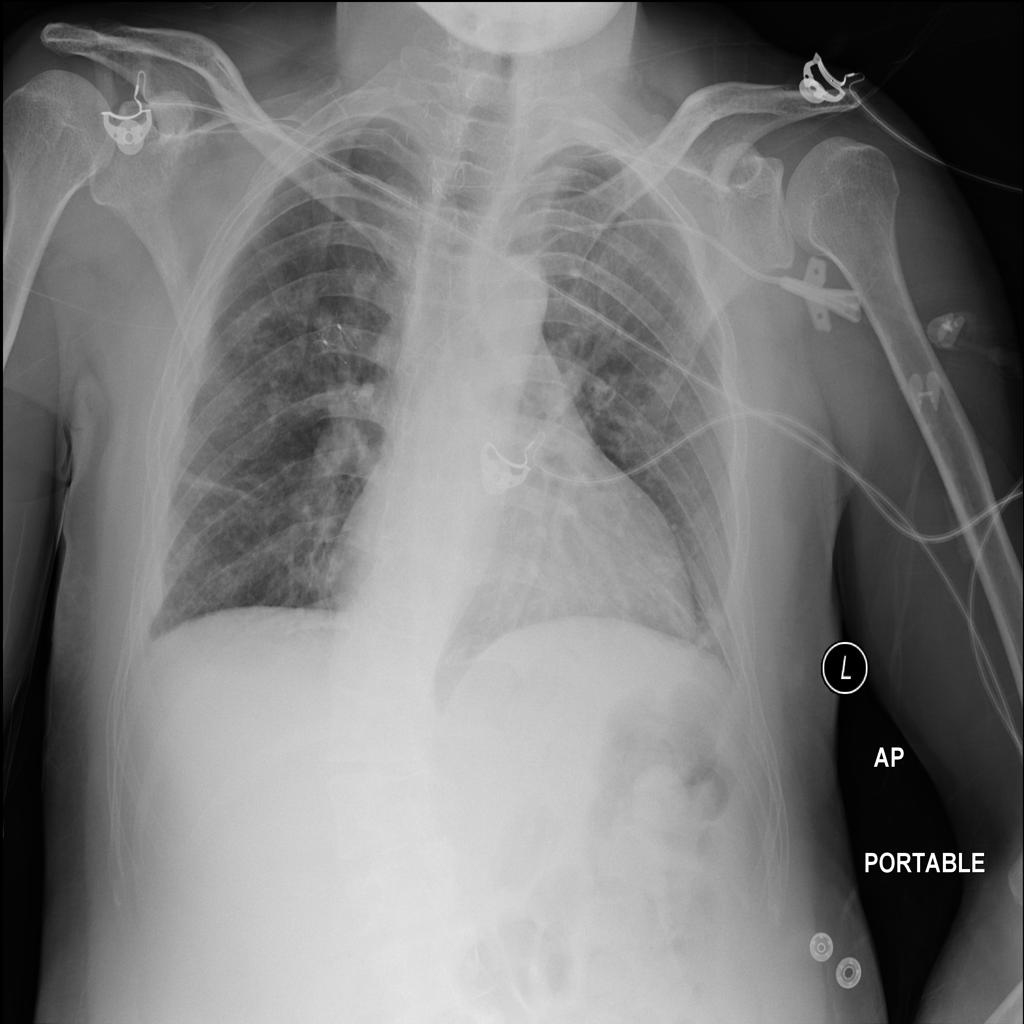

In [3]:
newimg

In [4]:
newimg = Image.open('./smallimages/00000003_000.png')

In [5]:
newimg.size

(224, 224)

In [13]:
data = np.asarray(newimg)

In [16]:
data

array([[ 51,  26,  15, ...,  13,  14,  12],
       [ 50,  25,  14, ...,  13,  14,  12],
       [ 49,  24,  14, ...,  12,  14,  12],
       ...,
       [  8,   7,   6, ...,  77, 158, 197],
       [ 22,  21,  19, ...,  79, 162, 201],
       [ 46,  44,  42, ...,  82, 166, 204]], dtype=uint8)

In [8]:
import pandas as pd
df = pd.read_csv('labels.csv')
def create_labels_dic():
    df['Finding Labels'].unique()
    labelslist = []
    for string in df['Finding Labels'].unique():
        labels = string.split('|')
        for label in labels:
            if label not in labelslist:
                labelslist.append(label)
    return labelslist

def encode_label(series):
    labels = []
    for instance in series:
        labels.append(instance.split('|'))
    return labels

    
from sklearn.preprocessing import MultiLabelBinarizer
labeler = MultiLabelBinarizer()
dic=[create_labels_dic()]
labeler.fit(dic)
labels = labeler.transform(encode_label(df['Finding Labels']))


In [17]:
def get_data(filename):
    return np.asarray(Image.open('./smallimages/' + filename))


mapped = zip(map(get_data, list(df['Image Index'])), labels)

In [19]:
list(mapped)

FileNotFoundError: [Errno 2] No such file or directory: './smallimages/00000001_000.png'

In [55]:
import sys
np.set_printoptions(threshold=sys.maxsize)
labels

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0,

In [36]:
df

Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_001.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0                57              M            PA                 2682   
1                58              M            PA                 2894   
2                58              M            PA                 2500   
3                80              M            PA                 2500   
4                74              F            PA                 2500   
...             ...            ...           ...                  ...   
112115           38              M            PA                 2048   
112116           28              M            PA                 2048   
112117           42              F            PA                 2048   
112118           29              F            PA                 2048   
112119           26              M            PA                 2048   

        Height]  OriginalImagePixelSpacing[x     y]  
0          2749                        0.143  0.143  
1          2729                        0.143  0.143  
2          2048                        0.168  0.168  
3          2048                        0.171  0.171  
4          2048                        0.168  0.168  
...         ...                          ...    ...  
112115     2500                        0.168  0.168  
112116     2500                        0.168  0.168  
112117     2500                        0.168  0.168  
112118     2500                        0.168  0.168  
112119     2500                        0.171  0.171  

[112120 rows x 11 columns]

In [76]:

test_data = np.array([[1,0,0,0],[0,0,1,1]])
print(test_data.shape)
truth_data = np.array([[1,1,1,0],[0,1,1,0]])
1 - np.sum(np.array(list(map(np.array_equal, test_data, truth_data)))) / len(test_data)
np.sum(test_data[truth_data==1] != 1)

(2, 4)


3